<a href="https://colab.research.google.com/github/Krishna-Dhawangale/Machine-Learning-Practical/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Name : Krishna Dhawangale
#USN : CS23032
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "diabetes_prediction_dataset.csv"

df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,
                            "iammustafatz/diabetes-prediction-dataset",file_path)

print(df.head())

/tmp/ipython-input-2599808343.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,


Using Colab cache for faster access to the 'diabetes-prediction-dataset' dataset.
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.shape

(100000, 9)

In [ ]:
df['diabetes'].unique()

array([0, 1])

In [ ]:
df.select_dtypes(include='object').columns
df = pd.get_dummies(df)


In [ ]:
X = df.drop('diabetes', axis=1)
print(X)

        age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99995  80.0             0              0  27.32          6.2   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  gender_Female  gender_Male  gender_Other  \
0                      140           True        False         False   
1                       80           True        False         False   
2              

In [ ]:
y = df['diabetes']
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='saga')

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter = [
    {
        'penalty': ['l1'],
        'C': [1, 2, 5],
        'max_iter': [2000]
    },
    {
        'penalty': ['l2'],
        'C': [1, 2, 5],
        'max_iter': [2000]
    },
    {
        'penalty': ['elasticnet'],
        'C': [1, 2, 5],
        'l1_ratio': [0.5],
        'max_iter': [2000]
    }
]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
classifier_regressor = GridSearchCV(classifier,param_grid=parameter, scoring='accuracy', cv=5)

In [ ]:
classifier_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'),
             param_grid=[{'C': [1, 2, 5], 'max_iter': [2000],
                          'penalty': ['l1']},
                         {'C': [1, 2, 5], 'max_iter': [2000],
                          'penalty': ['l2']},
                         {'C': [1, 2, 5], 'l1_ratio': [0.5], 'max_iter': [2000],
                          'penalty': ['elasticnet']}],
             scoring='accuracy')

In [ ]:
#print the best parameters out of all taken
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 2000, 'penalty': 'l2'}


In [ ]:
print(classifier_regressor.best_score_)

0.9607999999999999


In [ ]:
y_pred = classifier_regressor.predict(x_test)

In [ ]:
#Acuracy Score
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
score = accuracy_score(y_test, y_pred)
print(score)

0.9592333333333334


In [ ]:
# fro precision, Recall , Fq Score & Accuracy
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27453
           1       0.86      0.62      0.72      2547

    accuracy                           0.96     30000
   macro avg       0.91      0.80      0.85     30000
weighted avg       0.96      0.96      0.96     30000



In [ ]:
df.corr()

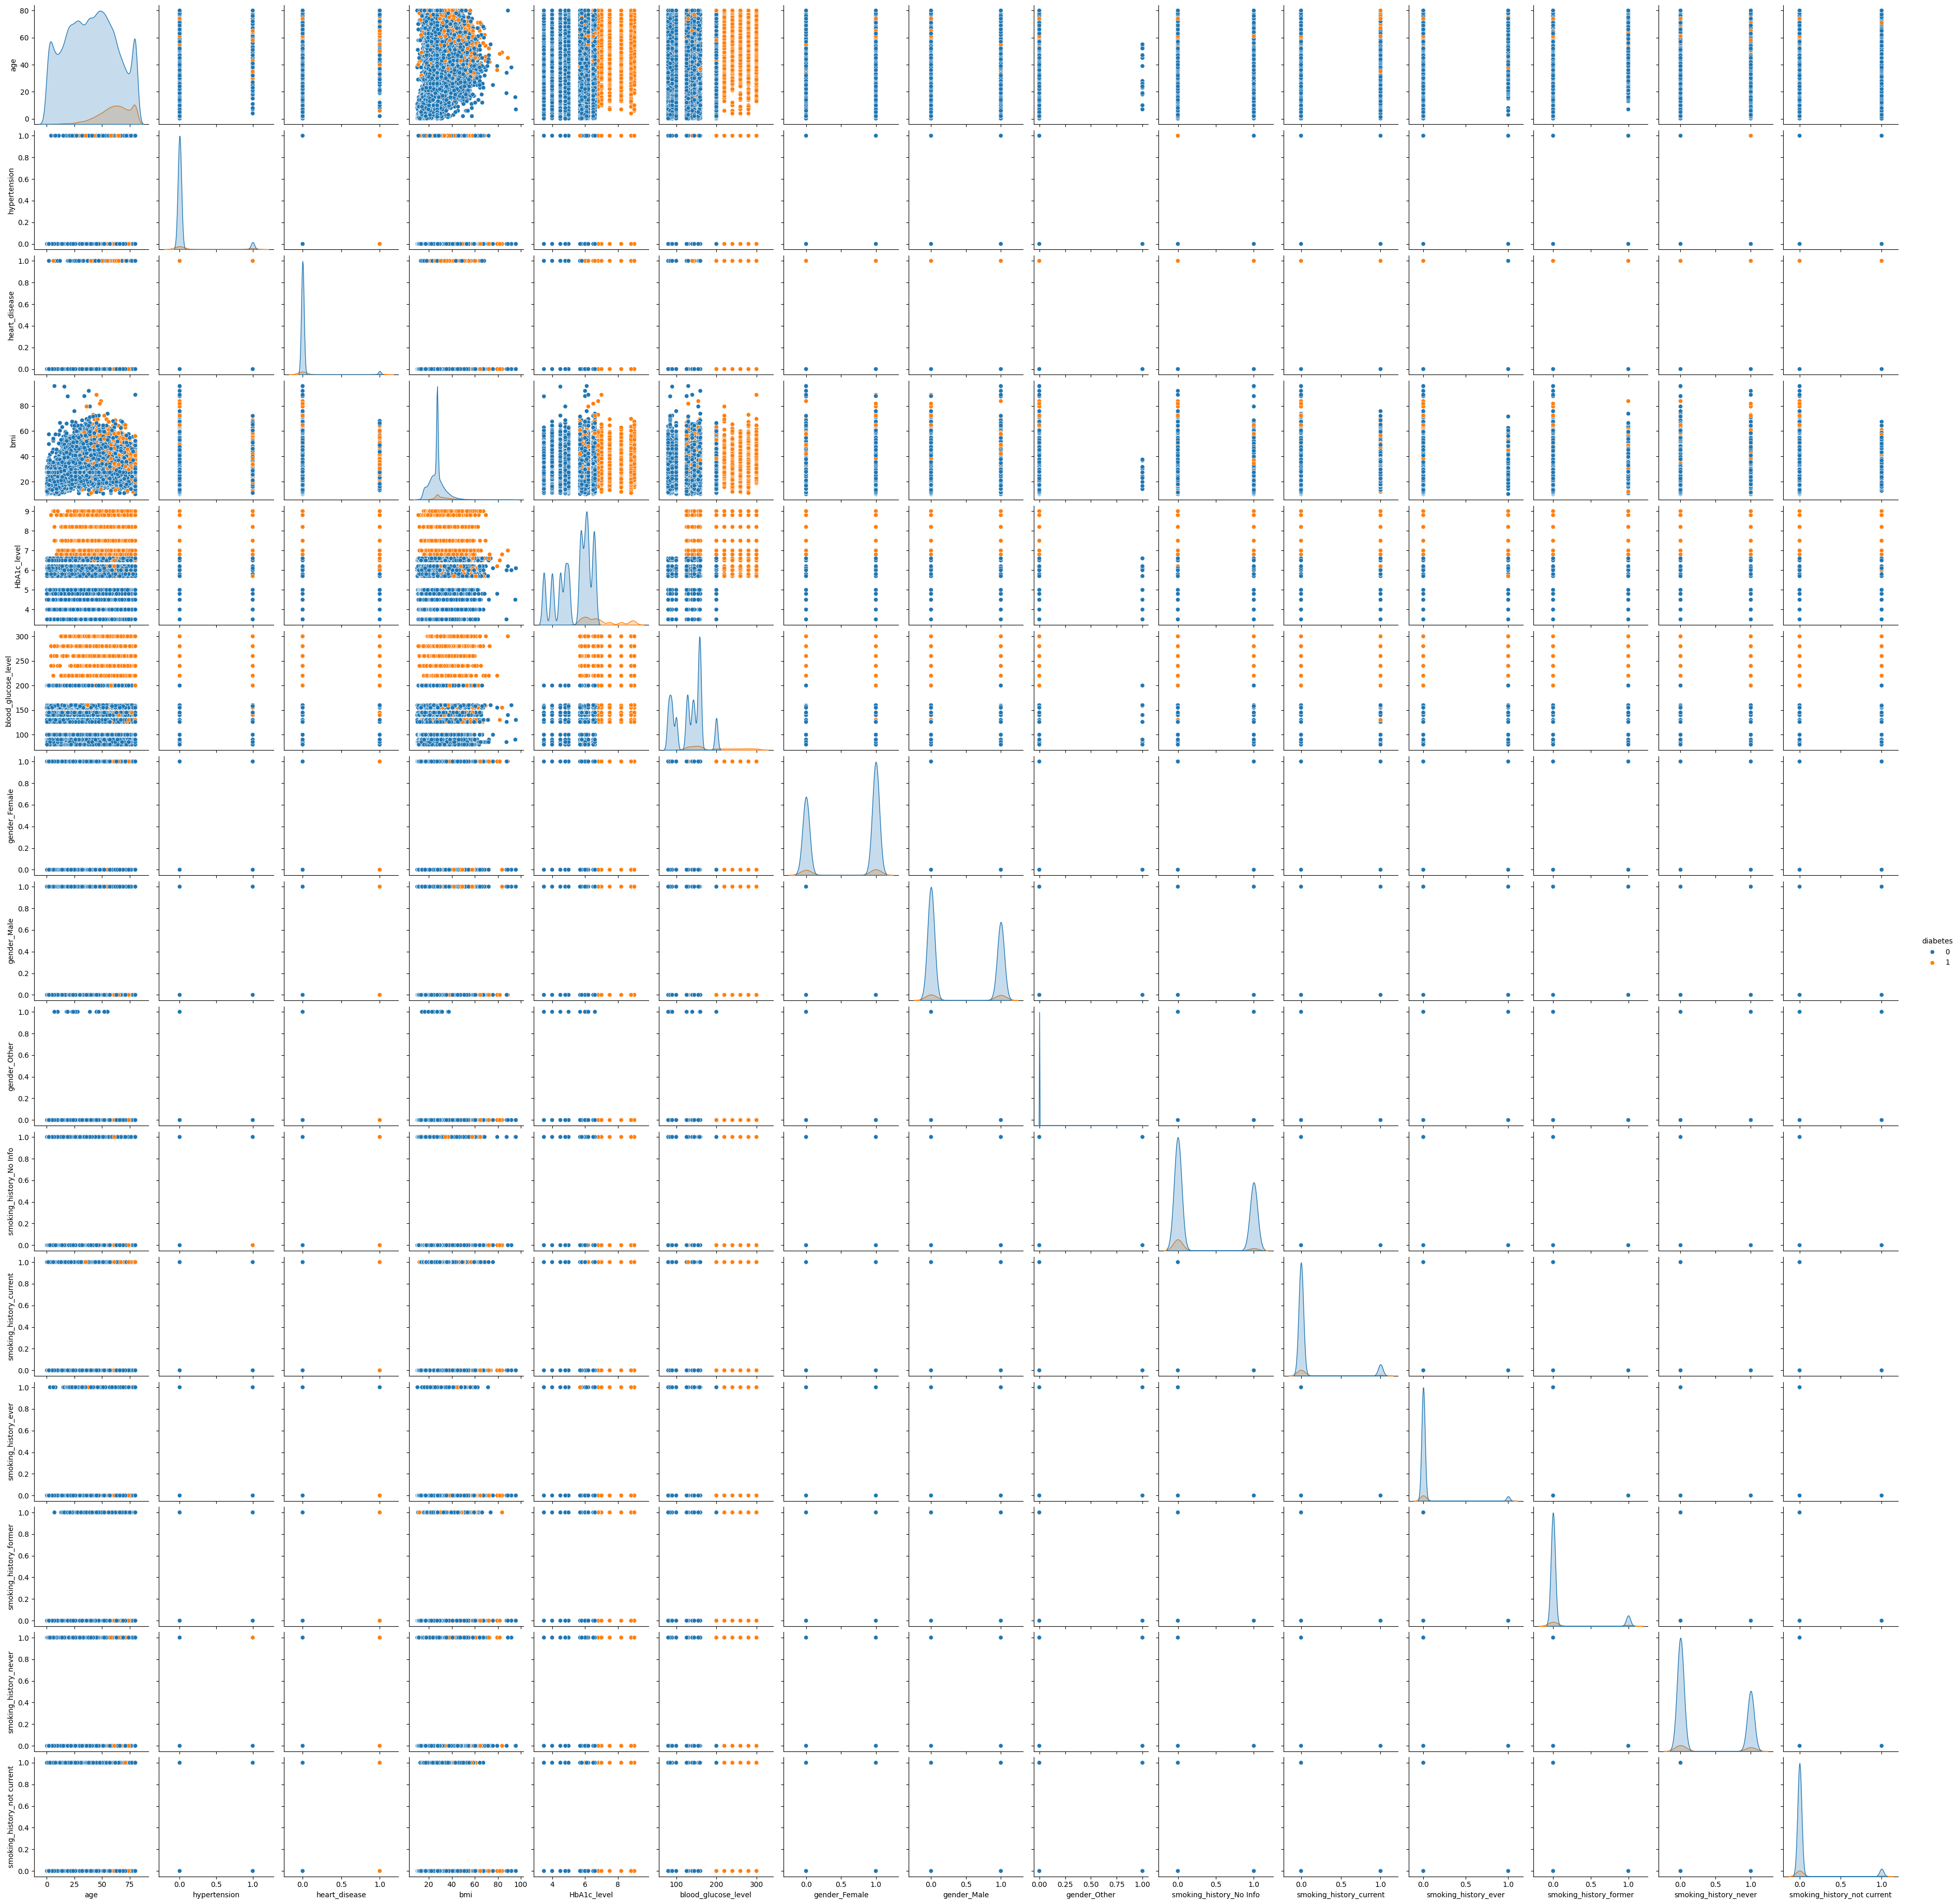

In [ ]:
# Exploratory DAta Analysis (EDA)
sns.pairplot(df,hue='diabetes')